<a href="https://colab.research.google.com/github/rodirk/spezielle_bioinfo_2_22/blob/main/Spezielle_bioinformatik_II_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

## Pinguine

### Exploration

In [ ]:
import seaborn as sns

In [ ]:
penguins_raw = sns.load_dataset("penguins")

In [ ]:
penguins_raw

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
penguins_raw["species"]

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [ ]:
penguins = penguins_raw.iloc[:,0:4].drop("island", axis=1)
penguins

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,NaN,NaN
4,Adelie,36.7,19.3
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,46.8,14.3
341,Gentoo,50.4,15.7
342,Gentoo,45.2,14.8


In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
4,Adelie,36.7,19.3
5,Adelie,39.3,20.6
...,...,...,...
338,Gentoo,47.2,13.7
340,Gentoo,46.8,14.3
341,Gentoo,50.4,15.7
342,Gentoo,45.2,14.8


In [ ]:
penguins["species"] = penguins.species.astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
penguins.dtypes

species           category
bill_length_mm     float64
bill_depth_mm      float64
dtype: object

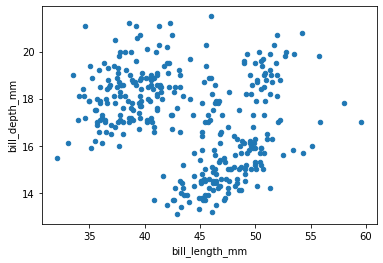

In [ ]:
penguins.plot.scatter("bill_length_mm", "bill_depth_mm");

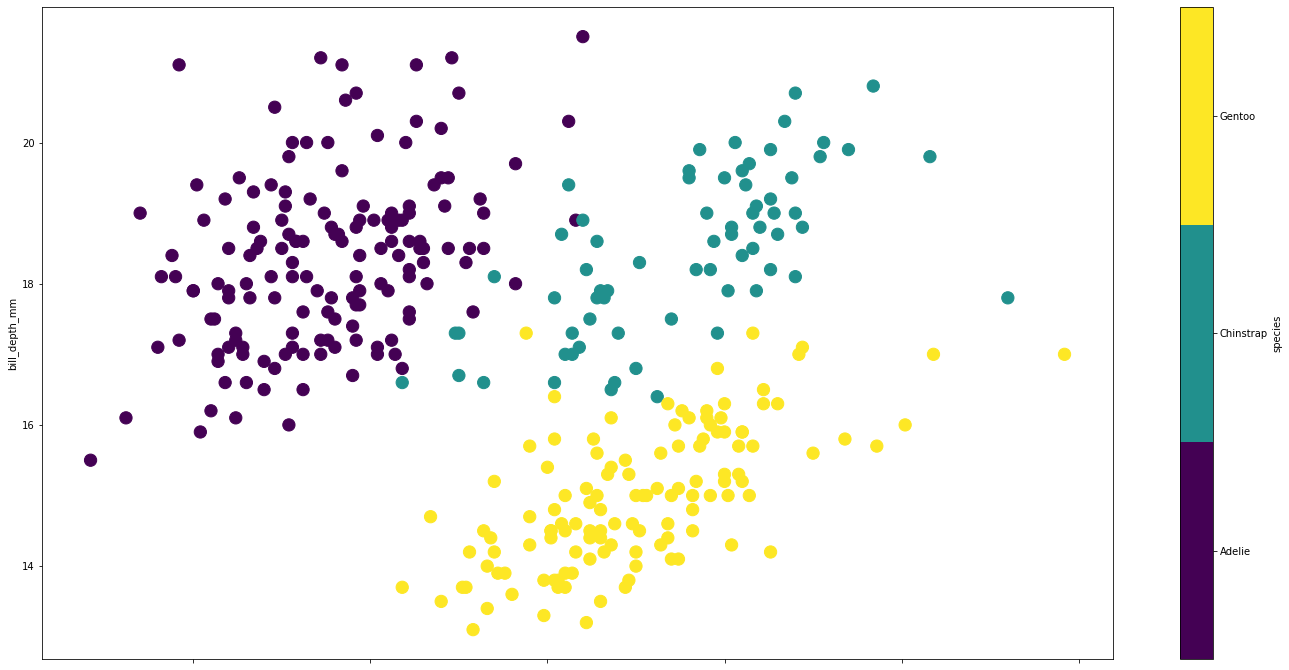

In [ ]:
penguins.plot.scatter("bill_length_mm", "bill_depth_mm", s=150, c="species", cmap="viridis", figsize=(24,12));

### Eigenes Modell

In [ ]:
for index, row in penguins.iterrows():
  # nutzt if und else Abfragen um mittels bill_length_mm und bill_depth_mm eine Vorhersage für die species zu machen
  prediction = "Adelie"
  if row["bill_length_mm"] > 40:
    if row["bill_depth_mm"] > 16:
      prediction = "Chinstrap"
    else:
      prediction = "Gentoo"
  print(row["species"], prediction)

Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Adelie
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinstrap
Adelie Adelie
Adelie Chinst

In [ ]:
correct = 0
total = 0

for index, row in penguins.iterrows():
  # nutzt if und else Abfragen um mittels bill_length_mm und bill_depth_mm eine Vorhersage für die species zu machen
  prediction = "Adelie"
  if row["bill_length_mm"] > 43:
    if row["bill_depth_mm"] > 17:
      prediction = "Chinstrap"
    else:
      prediction = "Gentoo"
  total += 1
  if row["species"] == prediction:
    correct += 1

accuracy = correct/total
print(accuracy)

0.9122807017543859


### Scikit-Learn

In [ ]:
import sklearn.tree

In [ ]:
X = penguins.iloc[:,1:3]
y = penguins.species

In [ ]:
# Initialisiere Entscheidungsbaum
tree = sklearn.tree.DecisionTreeClassifier()
# trainiere den Baum mit unseren Daten
tree.fit(X, y)
tree

DecisionTreeClassifier()

In [ ]:
tree.predict(X)

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [ ]:
tree.score(X, y)

1.0

In [ ]:
import sklearn.model_selection

In [ ]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=42)

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier()
# passe den Entscheidungsbaum an die Daten an (Training)
tree.fit(X_train, y_train)
# mache Vorhersagen auf Grundlage von X_val und überprüfe wie gut sie sind, mit y_val (Validation) - berechne Accuracy
tree.score(X_val, y_val)

0.9534883720930233

In [ ]:
tree.score(X_train, y_train)

1.0

#### Hyperparemeter

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_val, y_val)

0.9302325581395349

In [ ]:
for i in range(10):
  tree = sklearn.tree.DecisionTreeClassifier(max_depth=i+1)
  tree.fit(X_train, y_train)
  print(i+1, tree.score(X_val, y_val))

1 0.7558139534883721
2 0.9069767441860465
3 0.9302325581395349
4 0.9534883720930233
5 0.9534883720930233
6 0.9418604651162791
7 0.9418604651162791
8 0.9534883720930233
9 0.9534883720930233
10 0.9418604651162791


### KNN

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.9651162790697675

# Aufgaben für den Nachmittag

- Baumdaten erkunden (Plots)
- Verschiedene Modelle ausprobieren (DecisionTreeClassifier, KNeighborsClassifier, ...)
- Verschiedene Hyperparameter ausprobieren (max_depth, n_neighbors, ...)

## später gemeinsam

- Vorhersagen auf unbekannten Daten machen und abspeichern
- Ihr schickt mir bis zu 2 Vorhersagen
- Morgen: wir schauen wer gewonnen hat